In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
%matplotlib inline
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split 

In [2]:
df = pd.read_csv("Pima_Indian_diabetes.csv")

In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,742.000000,752.000000,768.000000,746.000000,768.000000,757.000000,768.000000,749.000000,768.000000
mean,3.866601,119.966097,68.886078,20.309879,79.799479,31.711151,0.471876,33.761336,0.348958
std,3.479971,32.367659,19.427448,15.974523,115.244002,8.544789,0.331329,12.297409,0.476951
min,-5.412815,0.000000,-3.496455,-11.945520,0.000000,-16.288921,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.100000,0.243750,24.000000,0.000000
50%,3.000000,116.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.250000,36.500000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
features = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [5]:
for feature in features:
    df[feature].fillna(value=df[feature].mean(), inplace=True)

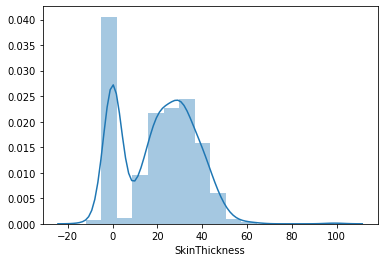

In [6]:
sns.distplot(a=df['SkinThickness'])

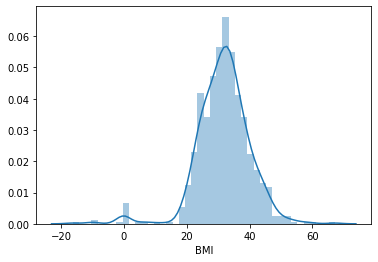

In [7]:
sns.distplot(a=df.BMI)

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.866601,119.966097,68.886078,20.309879,79.799479,31.711151,0.471876,33.761336,0.348958
std,3.420480,32.028277,19.427448,15.743756,115.244002,8.483295,0.331329,12.144139,0.476951
min,-5.412815,0.000000,-3.496455,-11.945520,0.000000,-16.288921,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.275000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,22.000000,30.500000,32.000000,0.372500,30.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,127.250000,36.425000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
for feature in features:
    df.loc[df[feature] < 0, feature] = 0

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.885689,119.966097,68.895389,20.357580,79.799479,31.760002,0.471876,33.761336,0.348958
std,3.384891,32.028277,19.393614,15.668404,115.244002,8.261584,0.331329,12.144139,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.275000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,22.000000,30.500000,32.000000,0.372500,30.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,127.250000,36.425000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
df.loc[df.Insulin >250, 'Insulin'] = 250

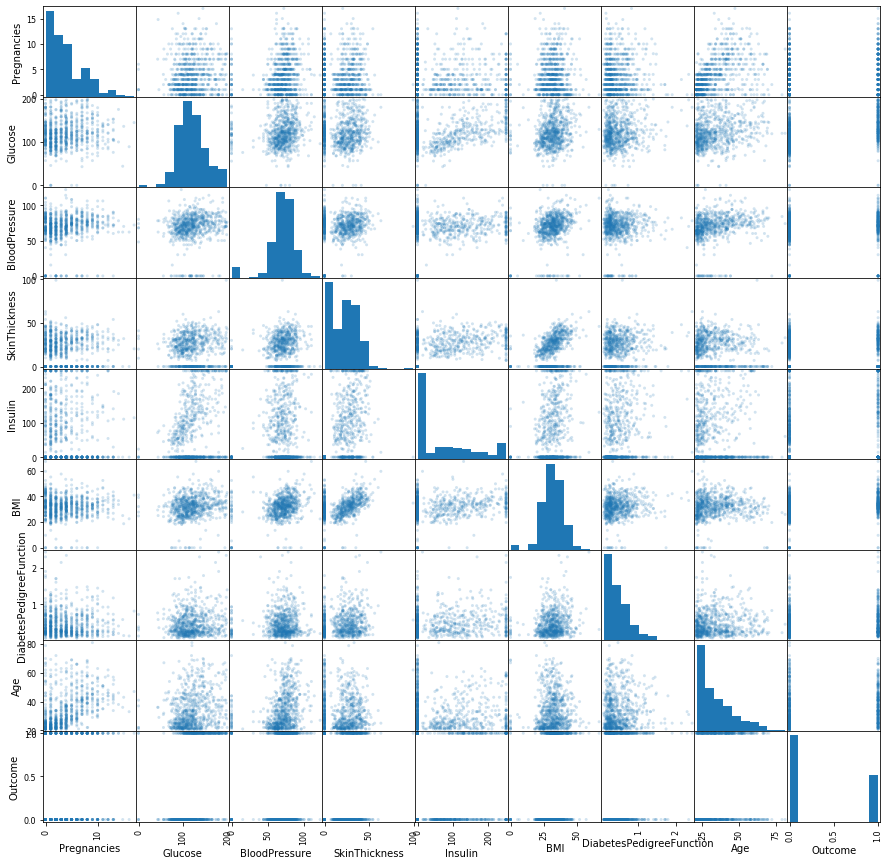

In [12]:
plot = scatter_matrix(df, alpha=0.2, figsize=(15, 15))

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
x = df.loc[:, features].values
y = df.loc[:,['Outcome']].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=7)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7'])

finalDf = pd.concat([principalDf, df[['Outcome']]], axis = 1)
finalDf.describe()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,Outcome
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,768.000000
mean,3.469447e-18,2.312965e-17,-6.938894e-18,9.251859e-18,-2.312965e-18,-1.387779e-17,1.503427e-17,0.348958
std,1.441936e+00,1.295842e+00,1.005887e+00,9.372271e-01,8.870426e-01,8.274543e-01,6.985170e-01,0.476951
min,-4.781271e+00,-2.258416e+00,-3.050868e+00,-2.637887e+00,-2.697383e+00,-3.211141e+00,-2.038174e+00,0.000000
25%,-9.976932e-01,-1.060414e+00,-6.636208e-01,-5.887173e-01,-5.411472e-01,-4.571647e-01,-4.073013e-01,0.000000
50%,-9.024262e-02,-3.162555e-01,-1.066560e-01,-1.113725e-01,-4.361483e-02,-4.574840e-02,-6.266701e-02,0.000000
75%,9.168703e-01,9.091917e-01,5.465670e-01,4.973862e-01,5.579805e-01,3.841381e-01,3.204116e-01,1.000000
max,5.028125e+00,3.606782e+00,3.964574e+00,4.364205e+00,2.778250e+00,4.577723e+00,3.294122e+00,1.000000


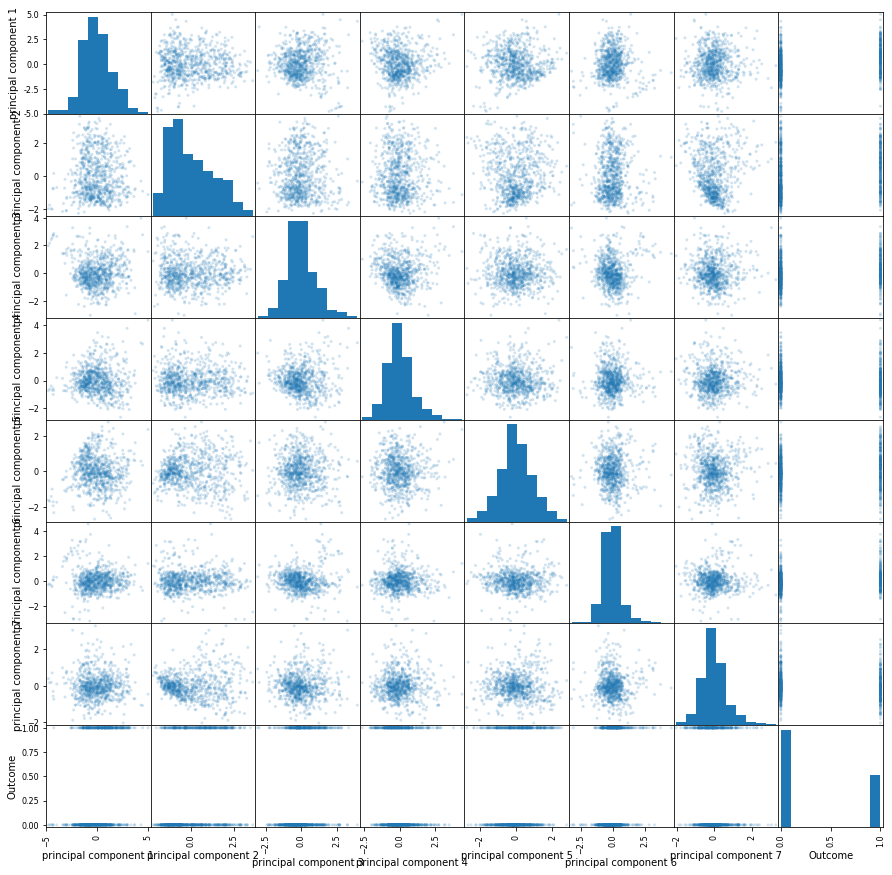

In [14]:
plot = scatter_matrix(finalDf, alpha=0.2, figsize=(15, 15))

In [15]:
X = finalDf[finalDf.columns[0:7]]
y = finalDf[finalDf.columns[7]]

In [16]:
accuracy = []

for i in range(100):
    df = finalDf.sample(frac=1)
    X = finalDf[finalDf.columns[0:7]]
    y = finalDf[finalDf.columns[7]] 
    
    trainX, valX, trainY, valY = train_test_split(X, y, test_size = 0.20)
    lr = LogisticRegression(max_iter=2000, solver='lbfgs')
    lr.fit(trainX, trainY)
    accuracy.append(lr.score(valX, valY)*100)

In [17]:
average_accuracy = sum(accuracy)/len(accuracy)

In [18]:
print(average_accuracy, max(accuracy), min(accuracy))

76.84415584415584 85.71428571428571 66.88311688311688
